In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": "--"})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

    99  : ESYS floater SENSOR 5	Pitch displacement - Trained on absolute values of max

In [2]:
feature = pd.read_csv("L_R_z_values_pass.csv", index_col=0)
label = pd.read_csv("Result_index_99.csv", index_col=1)
df = pd.merge(feature,label,on="File_ID",how="inner")
df = df[['L_values','R_anchor','z_fairlead','Min', 'Max']]

In [3]:
df.head()

,L_values,R_anchor,z_fairlead,Min,Max
File_ID,,,,,
0,800,800,0,-0.186880,0.103785
1,800,800,1,-0.162317,0.068588
2,800,800,2,-0.162615,0.068558
3,800,800,3,-0.207440,0.107342
4,800,800,4,-0.163160,0.067956


In [4]:
df['Min'] = df['Min'].abs()
df['Max'] = df['Max'].abs()

In [5]:
print('Maximum value of abs(minimum pitch): %.6f' % df['Min'].max())
print('Minimum value of abs(minimum pitch): %.6f' % df['Min'].min())
print('Range for minimum abs(pitch): %.6f' % (df['Min'].max()-df['Min'].min()))

print('\nMaximum value of abs(maximum pitch): %.6f' % df['Max'].max())
print('Minimum value of abs(maximum pitch): %.6f' % df['Max'].min())
print('Range for maximum abs(pitch): %.6f' % (df['Max'].max()-df['Max'].min()))

Maximum value of abs(minimum pitch): 0.229754
Minimum value of abs(minimum pitch): 0.121239
Range for minimum abs(pitch): 0.108515

Maximum value of abs(maximum pitch): 0.143786
Minimum value of abs(maximum pitch): 0.003171
Range for maximum abs(pitch): 0.140614


In [6]:
df['max (min, max)'] = df[['Min','Max']].max(axis=1)

In [7]:
df = df.drop(["Min", "Max"], axis=1)

In [8]:
df.head()

,L_values,R_anchor,z_fairlead,"max (min, max)"
File_ID,,,,
0,800,800,0,0.186880
1,800,800,1,0.162317
2,800,800,2,0.162615
3,800,800,3,0.207440
4,800,800,4,0.163160


In [9]:
print('Maximum value of max(abs(max, min)) pitch: %.6f' % df['max (min, max)'].max())
print('Minimum value of max(abs(max, min)) pitch: %.6f' % df['max (min, max)'].min())
print('Range for max(abs(max, min)) pitch: %.6f' % (df['max (min, max)'].max()-df['max (min, max)'].min()))
print('Mean for max(abs(max, min)) pitch: %.6f' % (np.mean(df['max (min, max)'])))

Maximum value of max(abs(max, min)) pitch: 0.229754
Minimum value of max(abs(max, min)) pitch: 0.121239
Range for max(abs(max, min)) pitch: 0.108515
Mean for max(abs(max, min)) pitch: 0.183331


In [10]:
df.shape

(1300, 4)

In [11]:
df.isna().sum()

L_values          0
R_anchor          0
z_fairlead        0
max (min, max)    0
dtype: int64

# Reference value for 15 MW turbine

In [12]:
reference_value = df[(df['R_anchor']== 840) & (df['L_values']== 850) & (df['z_fairlead']== 14 ) ].iloc[-1]

df.iloc[[df.index.get_loc(reference_value.name)]]

,L_values,R_anchor,z_fairlead,"max (min, max)"
File_ID,,,,
1194,850,840,14,0.153587


# Sensitivity analysis

In [13]:
# varying z_fairlead
df1 = df[(df['R_anchor']== 840) & (df['L_values']== 850) ]

# varying L
df2 = df[(df['R_anchor']== 840) & (df['z_fairlead']== 14) ]

# varying R_anchor
df3 = df[(df['L_values']== 850) & (df['z_fairlead']== 14) ]

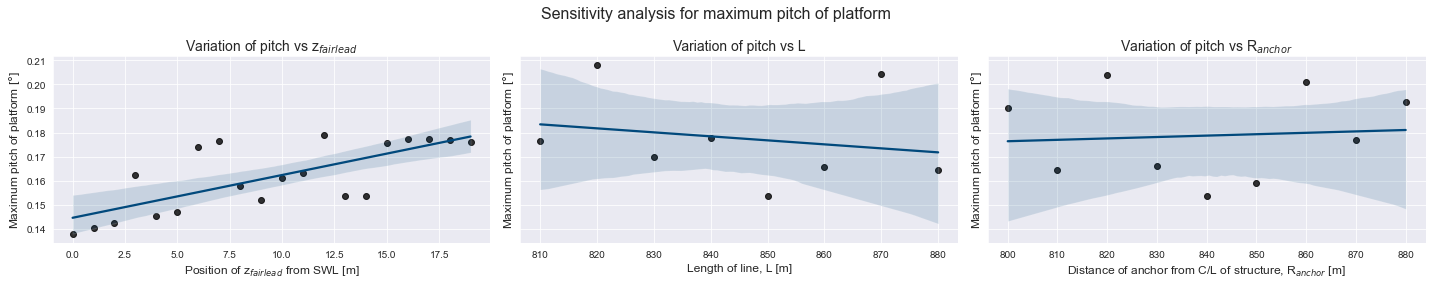

In [14]:
# Sensitivity plot
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)
fig.suptitle('Sensitivity analysis for maximum pitch of platform', size = 16)

# z_fairlead
sns.regplot(ax=axes[0], x='z_fairlead', y='max (min, max)', data=df1, scatter_kws={"color": "black"}, line_kws={"color": "#01497C"})
axes[0].set_xlabel( "Position of z$_{fairlead}$ from SWL [m]" , size = 12 )
axes[0].set_ylabel( "Maximum pitch of platform [$\degree$]" , size = 12 )
axes[0].set_title('Variation of pitch vs z$_{fairlead}$', size = 14)

# L_values
sns.regplot(ax=axes[1],x="L_values", y="max (min, max)", data=df2, scatter_kws={"color": "black"}, line_kws={"color": "#01497C"})
axes[1].set_xlabel( "Length of line, L [m]" , size = 12 )
axes[1].set_ylabel( "Maximum pitch of platform [$\degree$]" , size = 12 )
axes[1].set_title('Variation of pitch vs L', size = 14)

# R_anchor
sns.regplot(ax=axes[2],x="R_anchor", y="max (min, max)", data=df3, scatter_kws={"color": "black"}, line_kws={"color": "#01497C"})
axes[2].set_xlabel( "Distance of anchor from C/L of structure, R$_{anchor}$ [m]" , size = 12 )
axes[2].set_ylabel( "Maximum pitch of platform [$\degree$]" , size = 12 )
axes[2].set_title('Variation of pitch vs R$_{anchor}$', size = 14)

plt.tight_layout()
plt.show()

# Check for good design in data (reference 15 MW value)

In [15]:
df4 = df[(df['L_values']< 850) & (df['max (min, max)']<= df['max (min, max)'].values[df.index.get_loc(reference_value.name)]) ]

df4.to_csv('Reference_values_att_99.csv',index=True)

# Data analysis

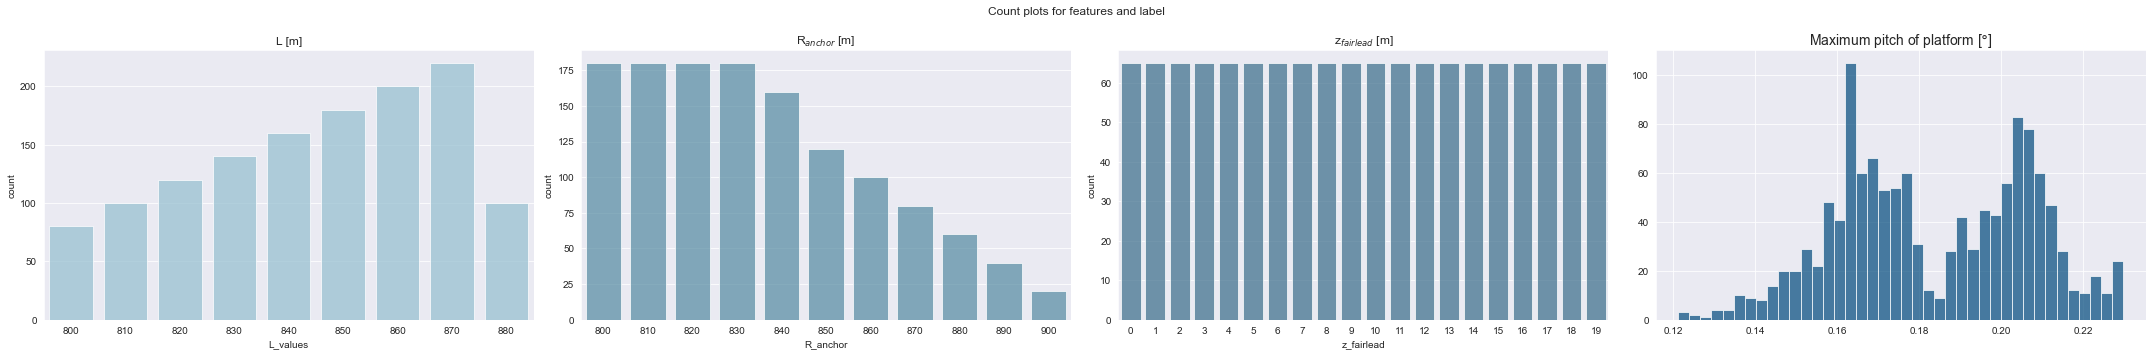

In [16]:
fig, ax = plt.subplots(1, 4,  figsize=(30,5))
fig.suptitle('Count plots for features and label')

# L
sns.countplot(ax=ax[0], x='L_values',data=df, color='#89C2D9', alpha=0.7)
ax[0].set_title('L [m]', size = 12)

# R_anchor
sns.countplot(ax=ax[1], x='R_anchor',data=df, color='#468FAF', alpha=0.7)
ax[1].set_title('R$_{anchor}$ [m]', size = 12)

# z_fairlead
sns.countplot(ax=ax[2], x='z_fairlead',data=df, color='#2A6F97', alpha=0.7)
ax[2].set_title('z$_{fairlead}$ [m]', size = 12)

# count tension
df.hist(ax=ax[3], column='max (min, max)',bins=40, color='#01497C', alpha=0.7)
ax[3].set_title('Maximum pitch of platform [$\degree$]', size = 14)

plt.tight_layout()

In [17]:
import warnings
warnings.filterwarnings("ignore")

<Figure size 720x720 with 0 Axes>

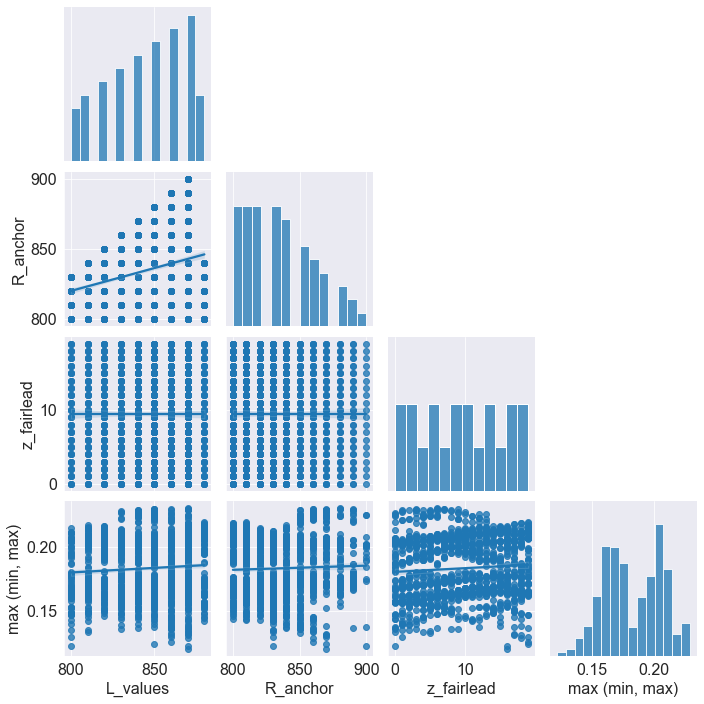

In [18]:
# pairplot to inspect relationship between dependant and independant variable
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.grid':True})
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
sns.pairplot(df, kind='reg', corner=True)
plt.show()

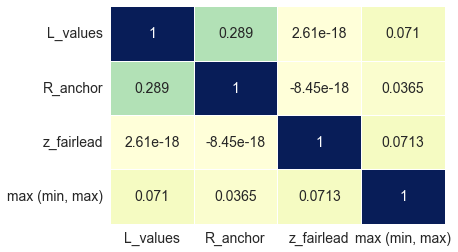

In [19]:
# plot heat map
plt.rcParams.update({'font.size': 14})
sns.heatmap(df.corr(), annot=True, fmt=".3g", linewidths=.5, cmap="YlGnBu", cbar=False)
plt.show()

In [20]:
df.describe().transpose()[['count', 'mean', 'std', 'min', 'max']] 

,count,mean,std,min,max
L_values,1300.0,844.923077,23.288073,800.000000,880.000000
R_anchor,1300.0,834.769231,26.269621,800.000000,900.000000
z_fairlead,1300.0,9.500000,5.768500,0.000000,19.000000
"max (min, max)",1300.0,0.183331,0.023274,0.121239,0.229754


# Split data into train and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
features=['L_values','R_anchor','z_fairlead']
labels=['max (min, max)']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(df[features],df[labels],test_size=0.2,random_state=42)

In [24]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (1040, 3)
x_test shape: (260, 3)
y_train shape: (1040, 1)
y_test shape: (260, 1)


In [25]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)

x_train shape: (1040, 3)
x_test shape: (260, 3)


# Feature Scaleing

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()

In [28]:
x_train = scaler.fit_transform(x_train.values)
x_test = scaler.transform(x_test.values)

In [29]:
import pickle 

pickle.dump(scaler, open('scaler_99.pkl','wb'))

In [30]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)

x_train shape: (1040, 3)
x_test shape: (260, 3)


# Model build

In [31]:
from tensorflow.keras import layers
from keras.callbacks import History

In [32]:
from keras.layers import Dense
from keras.models import Sequential

# define the keras model
model = Sequential()
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu', kernel_initializer='he_normal', name = 'first_layer'))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal', name = 'second_layer'))
model.add(Dense(1, activation='linear', name = 'output_layer'))

# compile the keras model
model.compile(
loss = keras.losses.MeanSquaredError(),
metrics =  ['mse'],
optimizer=keras.optimizers.Adam(learning_rate=0.001)
)

# fit the keras model on the dataset
history = History()
model.fit(x_train, y_train, epochs=2000, batch_size=64, verbose=2, callbacks=[history], validation_split=0.3, shuffle=True)

Epoch 1/2000
12/12 - 1s - loss: 1.1449 - mse: 1.1449 - val_loss: 0.8220 - val_mse: 0.8220 - 1s/epoch - 96ms/step
Epoch 2/2000
12/12 - 0s - loss: 0.7996 - mse: 0.7996 - val_loss: 0.5821 - val_mse: 0.5821 - 108ms/epoch - 9ms/step
Epoch 3/2000
12/12 - 0s - loss: 0.5656 - mse: 0.5656 - val_loss: 0.4199 - val_mse: 0.4199 - 112ms/epoch - 9ms/step
Epoch 4/2000
12/12 - 0s - loss: 0.4068 - mse: 0.4068 - val_loss: 0.3108 - val_mse: 0.3108 - 108ms/epoch - 9ms/step
Epoch 5/2000
12/12 - 0s - loss: 0.2982 - mse: 0.2982 - val_loss: 0.2345 - val_mse: 0.2345 - 111ms/epoch - 9ms/step
Epoch 6/2000
12/12 - 0s - loss: 0.2217 - mse: 0.2217 - val_loss: 0.1808 - val_mse: 0.1808 - 97ms/epoch - 8ms/step
Epoch 7/2000
12/12 - 0s - loss: 0.1697 - mse: 0.1697 - val_loss: 0.1417 - val_mse: 0.1417 - 94ms/epoch - 8ms/step
Epoch 8/2000
12/12 - 0s - loss: 0.1324 - mse: 0.1324 - val_loss: 0.1131 - val_mse: 0.1131 - 102ms/epoch - 8ms/step
Epoch 9/2000
12/12 - 0s - loss: 0.1044 - mse: 0.1044 - val_loss: 0.0918 - val_mse: 0

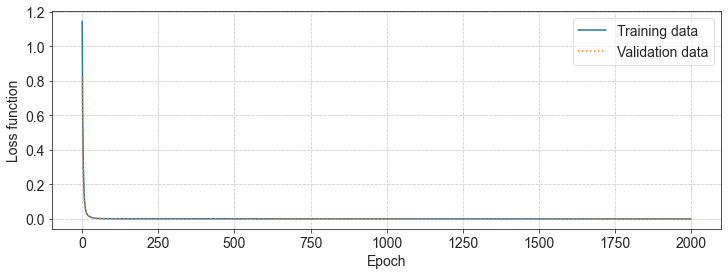

In [33]:
# recored of history of validation vs training loss
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], linewidth=1.5)
plt.plot(history.history['val_loss'], ":")
plt.title('model loss')
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='best', fancybox=True, framealpha=0.6)
plt.grid(True)
plt.show()

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 10)                40        
                                                                 
 second_layer (Dense)        (None, 5)                 55        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


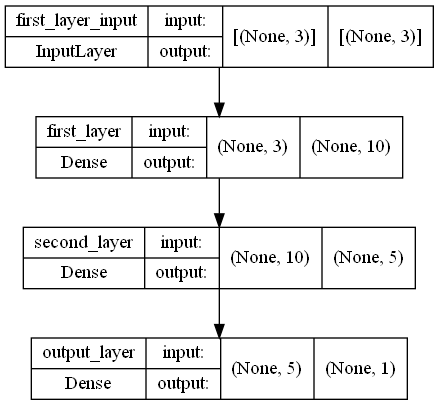

In [35]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

# Prediction

In [36]:
yhat = model.predict(x_test)

# Model performance

In [37]:
from sklearn.metrics import mean_absolute_error, r2_score

In [38]:
error = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % error)

MAE: 0.019


In [39]:
r2 = r2_score(y_test, yhat)
print('R-squared: %.3f' % r2)

R-squared: 0.084


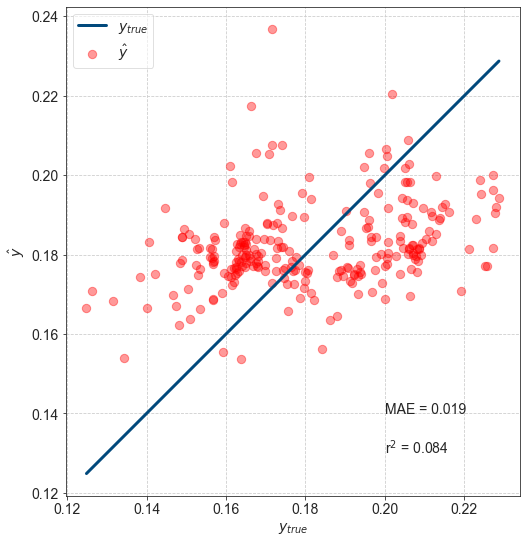

In [41]:
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": "--"})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

plt.figure(figsize=(9,9))
plt.rcParams.update({'font.size': 14})
plt.axes(aspect='equal')
sns.lineplot(x=y_test.iloc[:,0], y=y_test.iloc[:,0], linewidth=3, color='#01497C', label='$y_{true}$')
plt.scatter(x=y_test.iloc[:,0], y=yhat[:,0], c="red", label='$\hat{y}$', s=70, alpha = 0.4)

plt.annotate("r$^2$ = {:.3f}".format(r2), (0.2, 0.13))
plt.annotate("MAE = {:.3f}".format(error), (0.2, 0.14))

plt.xlabel('$y_{true}$')
plt.ylabel('$\hat{y}$')

plt.legend(loc='upper left', fancybox=True, framealpha=0.6)
plt.title('Validation of the prediction model')     
plt.grid(True)

plt.show()

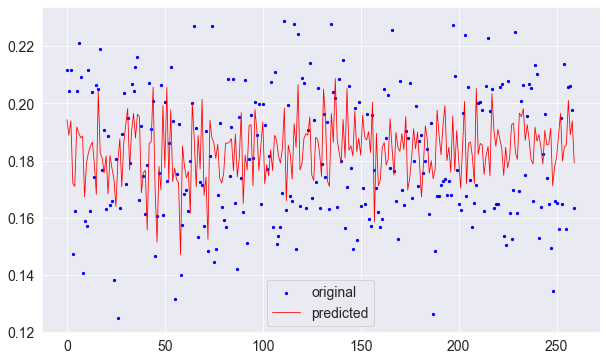

In [137]:
x_ax = range(len(yhat))
plt.figure(figsize=(10,6))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, yhat, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [138]:
# save model
model.save('model_attribute_99')